# Query with all alternatives

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

from pprint import pprint

from pricing.models.abtests import *
from pricing.utils import convert_numeric
# from src.utils import *
from pprint import pprint
import os
import plotly.express as px

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pricing.operations.experiments import level_1_kind_1_courses_1

print("Using as base_host: ", os.environ["PRICING_API_HOST"])

pd.set_option('display.max_columns', None)
from datetime import *


13/02/2020 14:33 - INFO - 

'>>>>>>>>>> Logger starting <<<<<<<<<<
 





CREATING A NEW INSTANCE OF LOGGER
>>>>> Creating Logger <<<<<
Setting the timezone
Setting logger at level debug
Logger outputting to the console
>>>>> Logger Created <<<<<
Using as base_host:  http://10.2.142.113:3000/


In [6]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.warning("test")

# Loading data of all_alternatives

In [2]:
df_all = load_raw_test_data(spark,from_cache = True)
print(df_all.shape[0])
df_all.head()

13/02/2020 14:33 - DEBUG - No specific list of alternatives ... downloading test data from all alternatives of experiments: [56, 57, 58, 59, 60, 61, 62, 63, 65]


Folder path:  /home/pricing/cache/
Cache mode!!
Loading cached file for filename: alternatives_data
211121


,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day
0,9275216,42268373,2020-01-11 00:20:46.868062,57,324,100.0,baseline,406841705,registered,183.46,183.46,366.91,NaN,2020-01-11 00:19:50.937233,25,366.97,False,NaN,Quero Bolsa,10871.0,Santana de Parnaíba,183.46,2020-01-11
1,9275580,40271054,2020-01-11 01:01:45.473867,58,329,100.0,baseline,405093800,registered,346.15,346.15,346.15,NaN,2020-01-11 00:58:09.443061,61,113.23,False,NaN,Quero Bolsa,6364.0,Brasília,346.15,2020-01-11
2,9275720,42114746,2020-01-11 01:22:29.578114,59,334,100.0,baseline,406836969,registered,490.00,490.00,490.00,NaN,2020-01-11 01:16:27.543660,288,245.00,False,NaN,Quero Bolsa,10901.0,São Paulo,490.00,2020-01-11
3,9276776,42077853,2020-01-11 04:25:20.420630,59,334,100.0,baseline,381999369,registered,348.83,348.83,348.83,NaN,2020-01-11 04:24:52.182255,34,249.17,False,NaN,Quero Bolsa,10901.0,São Paulo,348.83,2020-01-11
4,9277207,40169961,2020-01-11 10:44:23.350075,65,364,100.0,baseline,305285297,registered,245.18,245.18,299.00,NaN,2020-01-11 10:24:38.107967,2738,134.55,False,NaN,Quero Bolsa,NaN,,245.18,2020-01-11


,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day
0,9275216,42268373,2020-01-11 00:20:46.868062,57,324,100.0,baseline,406841705,registered,183.46,183.46,366.91,NaN,2020-01-11 00:19:50.937233,25,366.97,False,NaN,Quero Bolsa,10871.0,Santana de Parnaíba,183.46,2020-01-11
1,9275580,40271054,2020-01-11 01:01:45.473867,58,329,100.0,baseline,405093800,registered,346.15,346.15,346.15,NaN,2020-01-11 00:58:09.443061,61,113.23,False,NaN,Quero Bolsa,6364.0,Brasília,346.15,2020-01-11
2,9275720,42114746,2020-01-11 01:22:29.578114,59,334,100.0,baseline,406836969,registered,490.00,490.00,490.00,NaN,2020-01-11 01:16:27.543660,288,245.00,False,NaN,Quero Bolsa,10901.0,São Paulo,490.00,2020-01-11
3,9276776,42077853,2020-01-11 04:25:20.420630,59,334,100.0,baseline,381999369,registered,348.83,348.83,348.83,NaN,2020-01-11 04:24:52.182255,34,249.17,False,NaN,Quero Bolsa,10901.0,São Paulo,348.83,2020-01-11
4,9277207,40169961,2020-01-11 10:44:23.350075,65,364,100.0,baseline,305285297,registered,245.18,245.18,299.00,NaN,2020-01-11 10:24:38.107967,2738,134.55,False,NaN,Quero Bolsa,NaN,,245.18,2020-01-11


# Plot for the whole experiment

In [4]:
experiment_id = 61
df_exp = df_all[
    (df_all['fee_experiment_id']==experiment_id)&\
    (df_all['alternative']!='dummy')
]
df_exp.sort_values('created_day')


,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day
101309,9281067,42168862,2020-01-11 19:36:15.819886,61,344,100.0,baseline,111574917,paid,408.00,408.00,408.00,NaN,2020-01-11 19:31:42.327583,1493,299.20,False,2252644.0,Quero Bolsa,6537.0,Goiânia,408.00,2020-01-11
95075,9281579,39976290,2020-01-11 20:48:55.152380,61,344,100.0,baseline,406686175,paid,296.40,296.40,296.40,NaN,2020-01-11 20:48:18.318549,19,342.00,False,2252520.0,Quero Bolsa,9214.0,Rio de Janeiro,296.40,2020-01-11
96093,9280411,38931221,2020-01-11 18:03:30.819006,61,344,100.0,baseline,400951509,paid,551.09,551.09,551.09,NaN,2020-01-11 17:57:03.230366,1919,258.00,False,2252344.0,Quero Bolsa,6971.0,Belo Horizonte,551.09,2020-01-11
97160,9277224,42164359,2020-01-11 10:36:51.781651,61,344,100.0,baseline,407227494,registered,261.00,261.00,261.00,NaN,2020-01-11 10:34:59.519017,599,315.00,False,NaN,Quero Bolsa,6238.0,Fortaleza,261.00,2020-01-11
145721,9282086,34432528,2020-01-11 22:18:02.883474,61,344,100.0,baseline,405815009,paid,336.00,336.00,336.00,NaN,2020-01-11 22:09:42.113082,3272,624.00,False,2252628.0,Quero Bolsa,10445.0,Campinas,336.00,2020-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201669,9786571,54207843,2020-02-07 13:02:22.288819,61,344,80.0,baseline,412667759,commited,161.50,161.50,161.50,NaN,2020-02-07 12:53:47.221010,75,186.35,False,2347313.0,Quero Bolsa,6098.0,Salvador,161.50,2020-02-07
4253,9785743,53871755,2020-02-07 12:00:20.505045,61,344,80.0,baseline,418395678,paid,336.00,336.00,336.00,NaN,2020-02-07 11:57:13.852478,3272,490.75,False,2350680.0,Quero Bolsa,6971.0,Belo Horizonte,336.00,2020-02-07
163643,9782064,43009632,2020-02-07 00:59:14.232466,61,344,80.0,baseline,407939107,registered,218.40,218.40,218.40,NaN,2020-02-07 00:56:52.628216,501,252.00,False,NaN,Quero Bolsa,9326.0,Natal,218.40,2020-02-07
197453,9783825,37127889,2020-02-07 03:25:35.484852,61,344,80.0,baseline,201270167,registered,301.00,301.00,301.00,NaN,2020-02-07 03:24:23.871112,821,315.00,False,NaN,Quero Bolsa,5722.0,Manaus,301.00,2020-02-07


In [12]:
df_exp[df_exp['order_id']== 9344188]

KeyError: 'paid_at'

In [6]:
df_exp[(df_exp['alternative']=='seasonality plus')&(df_exp['created_day']=='2020-01-16')]


,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day
3346,9360731,43034793,2020-01-16 23:30:32.357880,61,346,10.0,seasonality plus,106999316,registered,319.73,319.73,319.73,NaN,2020-01-16 23:26:37.759487,25,226.07,False,NaN,Quero Bolsa,10826.0,Ribeirão Preto,290.67,2020-01-16
5501,9344188,42306822,2020-01-16 01:05:44.689960,61,346,10.0,seasonality plus,408725131,paid,420.65,420.65,420.65,NaN,2020-01-16 01:01:59.565136,1638,273.16,False,2263725.0,Quero Bolsa,9326.0,Natal,382.41,2020-01-16
21426,9345069,37127802,2020-01-16 02:09:31.337958,61,346,10.0,seasonality plus,408303966,registered,331.10,331.10,331.10,NaN,2020-01-16 02:03:44.637086,821,315.00,False,NaN,Quero Bolsa,5722.0,Manaus,301.00,2020-01-16
27924,9359510,42166014,2020-01-16 22:45:05.171870,61,346,10.0,seasonality plus,409060606,registered,304.30,304.30,304.30,NaN,2020-01-16 22:26:39.612043,34,395.20,False,NaN,Quero Bolsa,10896.0,São José dos Campos,276.64,2020-01-16
36296,9346257,42266398,2020-01-16 04:32:17.023663,61,346,10.0,seasonality plus,309626274,registered,506.99,506.99,506.99,NaN,2020-01-16 04:26:07.638274,1721,209.50,False,NaN,Quero Bolsa,10884.0,São Caetano do Sul,460.90,2020-01-16
64688,9351375,37301732,2020-01-16 15:30:46.739573,61,346,10.0,seasonality plus,408912131,registered,206.80,206.80,206.80,NaN,2020-01-16 15:27:38.348962,1666,100.00,False,NaN,Quero Bolsa,10901.0,São Paulo,188.00,2020-01-16
65741,9347680,39909206,2020-01-16 12:19:32.740239,61,346,10.0,seasonality plus,408844735,registered,277.44,277.44,277.44,NaN,2020-01-16 12:06:04.342927,25,196.17,False,NaN,Quero Bolsa,10642.0,Limeira,252.21,2020-01-16
67813,9357016,39889828,2020-01-16 20:14:07.048539,61,346,10.0,seasonality plus,405300250,commited,223.30,223.30,223.30,NaN,2020-01-16 20:05:57.522329,758,261.00,False,2265965.0,Quero Bolsa,8473.0,Recife,203.00,2020-01-16
70983,9356614,34432669,2020-01-16 19:50:03.377921,61,346,10.0,seasonality plus,408616174,paid,336.00,336.00,336.00,NaN,2020-01-16 19:47:15.681250,3272,624.00,False,2265883.0,Quero Bolsa,6971.0,Belo Horizonte,336.00,2020-01-16
81590,9348128,39889854,2020-01-16 12:39:44.912702,61,346,10.0,seasonality plus,408853132,registered,269.50,269.50,269.50,NaN,2020-01-16 12:37:13.499149,758,315.00,False,NaN,Quero Bolsa,8473.0,Recife,245.00,2020-01-16


# Exp 61

In [11]:
df_exp.head()

,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day
42,9297131,38931753,2020-01-13 16:35:26.620061,61,344,100.0,baseline,407785848,paid,426.13,426.13,426.13,NaN,2020-01-13 16:32:03.190401,1919,199.50,False,2255296.0,Quero Bolsa,6098.0,Salvador,426.13,2020-01-13
57,9303584,37323520,2020-01-13 22:06:10.442156,61,344,100.0,baseline,848604,paid,225.70,225.70,225.70,NaN,2020-01-13 21:59:50.638023,3014,213.50,False,2256457.0,Quero Bolsa,10901.0,São Paulo,225.70,2020-01-13
60,9305817,42288761,2020-01-14 00:35:46.604976,61,344,100.0,baseline,28073,registered,316.66,316.66,316.66,NaN,2020-01-14 00:02:03.619269,29,289.90,False,NaN,Quero Bolsa,10901.0,São Paulo,316.66,2020-01-14
73,9311449,42295204,2020-01-14 13:21:45.147772,61,344,100.0,baseline,407704953,paid,470.58,470.58,470.58,NaN,2020-01-14 13:20:00.881449,36,75.90,False,2257956.0,Quero Bolsa,10726.0,Osasco,470.58,2020-01-14
93,9319597,42166048,2020-01-14 19:40:47.253627,61,344,100.0,baseline,408236578,registered,326.53,326.53,326.53,NaN,2020-01-14 19:39:45.711126,34,466.47,False,NaN,Quero Bolsa,10901.0,São Paulo,326.53,2020-01-14


In [10]:
df_exp.groupby('alternative')['customer_id'].rolling('7d')

ValueError: window must be an integer

# Profiling get_cumulative_agg_results

In [32]:
aux = get_cumulative_agg_results(df_exp)
aux.head()

,alternative,created_day,n_visits,n_paids,revenue,cumsum_price,cumsum_offered_price,n_orders,alternative_ratio,av_price,av_offered_price,arpu,registered_conversion,av_ticket
0,baseline,2020-01-11,88,25.0,10331.69,31006.01,30450.58,89,100.0,348.382135,342.141348,117.405568,0.284091,413.267600
1,baseline,2020-01-12,155,48.0,18223.79,55133.41,51999.33,157,100.0,351.168217,331.205924,117.572839,0.309677,379.662292
2,baseline,2020-01-13,349,115.0,41825.50,124769.33,118189.05,358,100.0,348.517682,330.137011,119.843840,0.329513,363.700000
3,baseline,2020-01-14,586,188.0,65588.99,208743.51,195193.87,607,100.0,343.893756,321.571450,111.926604,0.320819,348.877606
4,baseline,2020-01-15,762,257.0,88316.77,275858.11,257894.21,802,100.0,343.962731,321.563853,115.901273,0.337270,343.645019


In [33]:
aux[aux['alternative']=='baseline'].tail()

,alternative,created_day,n_visits,n_paids,revenue,cumsum_price,cumsum_offered_price,n_orders,alternative_ratio,av_price,av_offered_price,arpu,registered_conversion,av_ticket
23,baseline,2020-02-03,3527,1187.0,422378.09,1383012.22,1235885.51,3943,80.0,350.751260,313.437867,119.755625,0.336547,355.836639
24,baseline,2020-02-04,3707,1233.0,440942.07,1465353.59,1306193.30,4164,80.0,351.910084,313.687152,118.948495,0.332614,357.617251
25,baseline,2020-02-05,3872,1284.0,457468.64,1538981.72,1368995.37,4367,80.0,352.411660,313.486460,118.147893,0.331612,356.283988
26,baseline,2020-02-06,4021,1321.0,470909.79,1604651.76,1425268.73,4541,80.0,353.369689,313.866710,117.112606,0.328525,356.479780
27,baseline,2020-02-07,4086,1334.0,475126.55,1633528.17,1449958.64,4618,80.0,353.730656,313.979783,116.281583,0.326481,356.166829


In [14]:
df_exp[['alternative_id','alternative']].drop_duplicates()

,alternative_id,alternative
42,344,baseline
358,347,seasonality minus
537,346,seasonality plus
50926,345,dynamic pricing


# Filtering data for alternative

In [23]:
def simple_get_alternative_test_data(df_all,alternative_id):
    '''
    Filters the output of @load_raw_test_data for a specific alternative_id
    '''
    experiment_id = df_all[df_all['alternative_id']==alternative_id]['fee_experiment_id'].unique().tolist()[0]
    baseline_id = df_all[
        (df_all['fee_experiment_id'] == experiment_id)&\
        (df_all['alternative']=='baseline')
    ]['alternative_id'].unique().tolist()[0]

    df = df_all[df_all['alternative_id'].isin([alternative_id,baseline_id])]

    #Filtering days where both alternatives had ratio > 0
    valid_days = _get_valid_days(df)
    # print("valid days -> ", valid_days)
    df = df[df['created_day'].isin(valid_days)]

    return df


In [24]:
alternative_id = 346
df = get_alternative_test_data(df_all,alternative_id)
df.head()


Cleaning alternative test data ...
Theoretical discount:  -0.10000000000000009
% of rows in cleaning:  1.6600790513834056 %


,order_id,offer_id,registered_at,fee_experiment_id,alternative_id,alternative_ratio,alternative,customer_id,checkout_step,price,value,original_value,discount_value,created_at,university_id,offered_price,exchange,coupon_id,origin,city_id,city,baseline_value,created_day,alternative_discount
169,9355278,42288682,2020-01-16 18:53:48.085845,61,344,80.0,baseline,248527079,registered,341.39,361.39,361.39,NaN,2020-01-16 18:50:00.870877,29,330.85,False,NaN,Quero Bolsa,10901.0,São Paulo,361.39,2020-01-16,NaN
172,9359377,43011518,2020-01-16 22:26:13.645518,61,344,80.0,baseline,249831716,paid,296.99,296.99,296.99,NaN,2020-01-16 22:19:22.760770,63,230.99,False,2266368.0,Quero Bolsa,8473.0,Recife,296.99,2020-01-16,NaN
306,9435283,35272512,2020-01-20 16:53:42.050203,61,344,80.0,baseline,407799296,registered,234.65,234.65,234.65,NaN,2020-01-20 16:50:14.104613,47,283.19,False,NaN,Quero Bolsa,10873.0,Santo André,234.65,2020-01-20,NaN
312,9438759,43243864,2020-01-20 19:26:20.944400,61,344,80.0,baseline,114236,registered,336.44,336.44,336.44,NaN,2020-01-20 19:25:56.215735,19,271.32,False,NaN,Quero Bolsa,9214.0,Rio de Janeiro,336.44,2020-01-20,NaN
447,9510700,42289193,2020-01-23 14:28:10.391319,61,344,80.0,baseline,413235899,registered,354.29,354.29,354.29,NaN,2020-01-23 14:26:01.501549,29,324.35,False,NaN,Quero Bolsa,10901.0,São Paulo,354.29,2020-01-23,NaN


In [26]:
df_cum_results = get_cumulative_agg_results(df)
# hist_data = {
#     'conversion':{
#         'mean': .07,
#         'std': .2
#     },
#     'aov':{
#         'mean': 500,
#         'std':100
#     }
# }
hist_data = None
abtest = BayesianABTest('arpu',df['alternative'].unique().tolist(), hist_data = hist_data)


Initiating ABTests with priors:
{'baseline': {'lambda': {'alpha': 1, 'beta': 1}, 'theta': {'k': 1, 'omega': 1}},
 'seasonality plus': {'lambda': {'alpha': 1, 'beta': 1},
                      'theta': {'k': 1, 'omega': 1}}}


In [28]:
df_cum_results[[df_cum_results['created_day']=='2020-01-16']]

ValueError: Item wrong length 1 instead of 44.

In [18]:
#Feeding data to the test
for alternative in df['alternative'].unique().tolist():
    
    last_data = df_cum_results.groupby('alternative').agg('last').reset_index()

    n_visits = last_data[last_data['alternative']==alternative]['n_visits'].values[0]
    n_paids = last_data[last_data['alternative']==alternative]['n_paids'].values[0]
    revenue = last_data[last_data['alternative']==alternative]['revenue'].values[0]
    arpu = last_data[last_data['alternative']==alternative]['arpu'].values[0]


    print("\nData for alternative :" , alternative)
    print("n_visits: ", n_visits,"\nn_paids: ", n_paids, "\nrevenue: ",revenue, "arpu: ",arpu)
  
    
    abtest.feed_alternative_data(
        alternative,
        n_visits=n_visits,
        n_paids=n_paids,
        revenue = revenue
    )



Data for alternative : baseline
n_visits:  3339 
n_paids:  1064.0 
revenue:  382593.0199999999 arpu:  114.58311470500146

Data for alternative : seasonality plus
n_visits:  314 
n_paids:  86.0 
revenue:  36247.68 arpu:  115.43847133757961


In [7]:
# abtest.plot_parameter_distributions()

In [22]:
def get_cumulative_compare_results(df):
    '''
    Same as @get_cumulative_agg_results but in pivoted way to facilitate comparision b/w alternatives
    '''
    df_cum_results = get_cumulative_agg_results(df)
    alternative_name = df[df['alternative']!='baseline']['alternative'].unique().tolist()[0]
    df_compare = df_cum_results.pivot(
    index='created_day',
    columns='alternative',
    values=['n_visits', 'n_paids','registered_conversion',
            'av_ticket', 'revenue','arpu']
    )
#     df_compare['ticket_decrease'] = 1-df_compare[('av_ticket',alternative_name)]/df_compare[('av_ticket','baseline')]
    # df_compare['price_discount'] = 1- df_cum_results_price['seasonality lower']/df_cum_results_price['baseline']
    return df_compare


get_cumulative_compare_results(df)

n_visits                   n_paids                   \
alternative baseline seasonality plus baseline seasonality plus   
created_day                                                       
2020-01-16     156.0             14.0     44.0              4.0   
2020-01-17     291.0             30.0     97.0              8.0   
2020-01-18     389.0             35.0    131.0              9.0   
2020-01-19     457.0             41.0    149.0             10.0   
2020-01-20     615.0             56.0    204.0             14.0   
2020-01-21     807.0             76.0    264.0             16.0   
2020-01-22     999.0             99.0    334.0             21.0   
2020-01-23    1205.0            121.0    385.0             29.0   
2020-01-24    1378.0            136.0    457.0             32.0   
2020-01-25    1476.0            139.0    485.0             33.0   
2020-01-26    1564.0            145.0    512.0             34.0   
2020-01-27    1751.0            161.0    581.0             38.0   
2020-01-28    1942.0            177.0    633.0             44.0   
2020-01-29    2138.0            197.0    715.0             51.0   
2020-01-30    2328.0            218.0    770.0             60.0   
2020-01-31    2480.0            231.0    814.0             64.0   
2020-02-01    2566.0            241.0    843.0             66.0   
2020-02-02    2633.0            246.0    863.0             66.0   
2020-02-03    2834.0            263.0    930.0             70.0   
2020-02-04    3019.0            279.0    976.0             79.0   
2020-02-05    3188.0            298.0   1027.0             83.0   
2020-02-06    3339.0            314.0   1064.0             86.0   

            registered_conversion                    av_ticket  \
alternative              baseline seasonality plus    baseline   
created_day                                                      
2020-01-16               0.282051         0.285714  303.628182   
2020-01-17               0.333333         0.266667  346.740000   
2020-01-18               0.336761         0.257143  352.989924   
2020-01-19               0.326039         0.243902  353.913356   
2020-01-20               0.331707         0.250000  344.585882   
2020-01-21               0.327138         0.210526  339.962462   
2020-01-22               0.334334         0.212121  341.275389   
2020-01-23               0.319502         0.239669  344.088779   
2020-01-24               0.331640         0.235294  348.750700   
2020-01-25               0.328591         0.237410  349.501320   
2020-01-26               0.327366         0.234483  347.909980   
2020-01-27               0.331810         0.236025  350.392685   
2020-01-28               0.325953         0.248588  350.620853   
2020-01-29               0.334425         0.258883  350.743301   
2020-01-30               0.330756         0.275229  353.904831   
2020-01-31               0.328226         0.277056  354.813034   
2020-02-01               0.328527         0.273859  353.532005   
2020-02-02               0.327763         0.268293  353.984334   
2020-02-03               0.328158         0.266160  359.205720   
2020-02-04               0.323286         0.283154  361.296414   
2020-02-05               0.322146         0.278523  359.446806   
2020-02-06               0.318658         0.273885  359.579906   

                                revenue                         arpu  \
alternative seasonality plus   baseline seasonality plus    baseline   
created_day                                                            
2020-01-16        420.135000   13359.64          1680.54   85.638718   
2020-01-17        358.620000   33633.78          2868.96  115.580000   
2020-01-18        348.604444   46241.68          3137.44  118.873213   
2020-01-19        350.173000   52733.09          3501.73  115.389694   
2020-01-20        356.802143   70295.52          4995.23  114.301659   
2020-01-21        348.288125   89750.09          5572.61  111.214486   
2020-01-22        346.543810  113985.

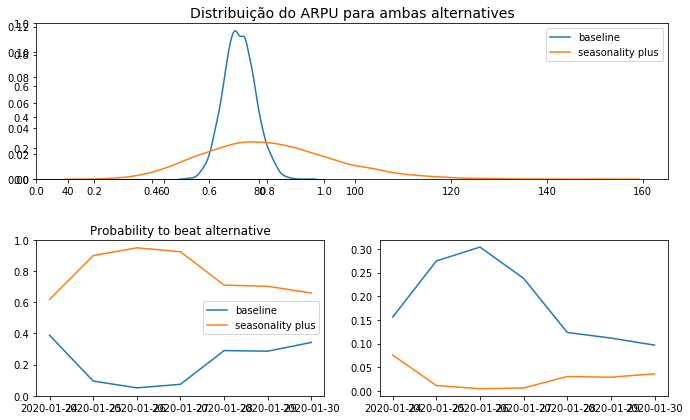

In [68]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
gs = axs[0,0].get_gridspec()
# remove the underlying axes
for ax in axs[0,1:]:
    ax.remove()
axbig = fig.add_subplot(gs[0,0:])

fig.tight_layout()

abtest.plot_results(ax=axbig)
abtest.plot_cumulative_results(df_cum_results,ax=axs[1])

plt.tight_layout()
plt.show()


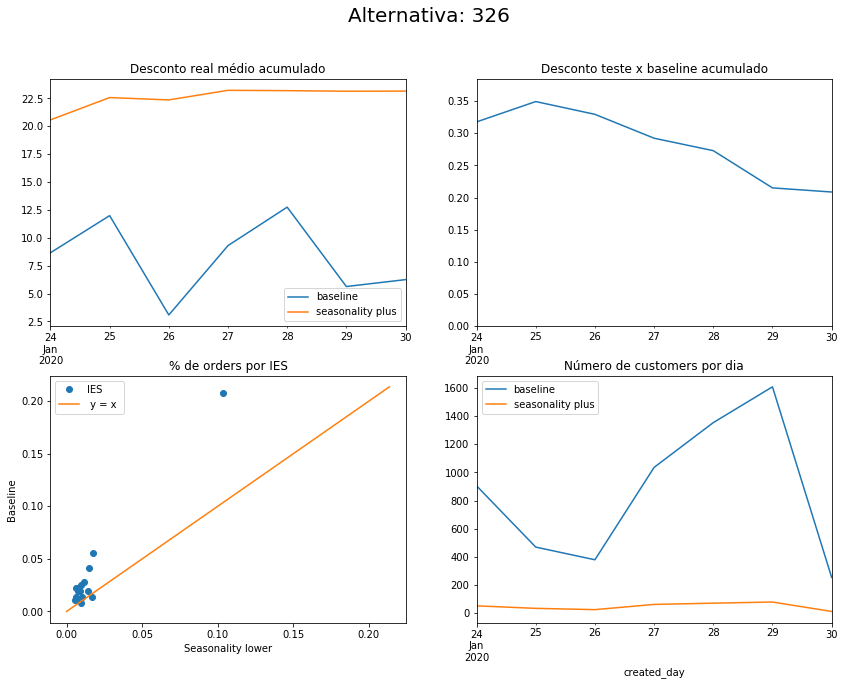

None

In [75]:
alternative_name = df[df['alternative']!='baseline']['alternative'].unique().tolist()[0]
fig,ax= plt.subplots(2,2,figsize=(14,10))

#Discount in price baseline x alternative
for alternative in df_cum_results['alternative'].unique().tolist():
    df_cum_results[df_cum_results['alternative'] == alternative].set_index('created_day')['av_real_discount'].plot(ax=ax[0][0],label = alternative)
ax[0][0].set_title("Desconto real médio acumulado")
ax[0][0].set_xlabel("")
ax[0][0].legend()

#Avg accumulated price 
df_cum_results_price = df_cum_results.reset_index().pivot(index='created_day',columns = 'alternative',values='av_price')
df_cum_results_price['price_discount'] = 1- df_cum_results_price[alternative_name]/df_cum_results_price['baseline']
df_cum_results_price['price_discount'].plot(ax=ax[0][1],title = "Desconto teste x baseline acumulado")
ax[0][1].set_xlabel("")
y_max = 1.1*df_cum_results_price['price_discount'].max()
ax[0][1].set_ylim((0,y_max))

#Distribution of orders per university
df_cum_results_uni = df.groupby('alternative')['university_id'].apply(lambda x: (x.value_counts()/x.shape[0]).iloc[:30]).reset_index()
df_cum_results_uni = df_cum_results_uni.pivot(index='level_1',columns = 'alternative',values = 'university_id').sort_values('baseline',ascending=False)
ax[1][0].plot(df_cum_results_uni['baseline'], df_cum_results_uni[alternative_name],'o',label = 'IES' )
ax[1][0].set_title("% de orders por IES")
ax[1][0].set_ylabel("Baseline")
ax[1][0].set_xlabel("Seasonality lower")
ax[1][0].plot([0,df_cum_results_uni['baseline'].max()],[0,df_cum_results_uni['baseline'].max()],label =' y = x ')
ax[1][0].legend()

#Numbers of unique customers per day
df_customers = df.groupby(['created_day','alternative'])['customer_id'].nunique().reset_index().set_index('created_day')
for alternative in df_customers['alternative'].unique().tolist():
    df_customers[df_customers['alternative'] == alternative]['customer_id'].plot(ax=ax[1][1],label = alternative)
ax[1][1].set_title("Número de customers por dia")
ax[1][1].legend()

fig.suptitle("Alternativa: " + str(alternative_id),fontsize = 20)
plt.legend()
# plt.tight_layout()
display(plt.show())


